In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
import patsy

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score



In [2]:
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']

In [4]:
df.shape

(506, 14)

In [5]:
df_train = df.sample(400).copy()
df_test = df[~df.index.isin(df_train.index)].copy()

In [6]:
formula = 'target ~ LSTAT + RM + PTRATIO -1'
y_train, X_train = patsy.dmatrices(formula, data=df_train, return_type = 'dataframe')
y_test, X_test = patsy.dmatrices(formula, data=df_test, return_type = 'dataframe')

In [7]:
type(X_train), type(y_train),type(X_test),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [8]:
X_train.shape, y_train.shape

((400, 3), (400, 1))

In [9]:
X_test.shape,y_test.shape

((106, 3), (106, 1))

In [10]:
X_test.head()

,LSTAT,RM,PTRATIO
0,4.98,6.575,15.3
13,8.26,5.949,21.0
16,6.58,5.935,21.0
19,11.28,5.727,21.0
23,19.88,5.813,21.0


In [11]:
lr = linear_model.LinearRegression()

In [12]:
lr.fit(X_train,y_train.values)

/Users/edoardo/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lr.coef_

array([[-0.570742  ,  4.26504841, -0.85508863]])

In [14]:
lr.intercept_

array([18.82479918])

In [15]:
y_test_pred = lr.predict(X_test)

In [16]:
min(y_test) # THIS IS STRANGE!

'target'

In [17]:
max(y_test) # THIS IS STRANGE!

'target'

In [18]:
min(y_test.values) # THIS IS OK!

array([5.])

In [19]:
max(y_test.values) # THIS IS OK!

array([50.])

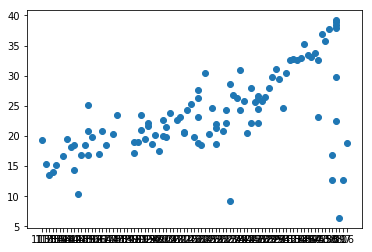

In [20]:
# STRANGE RESULTS

plt.scatter(y_test, y_test_pred)

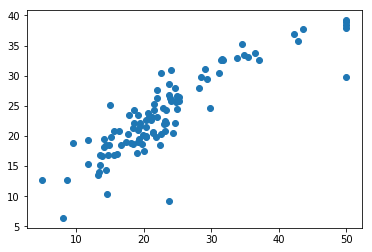

In [21]:
# NORMAL RESULTS

plt.scatter(y_test.values, y_test_pred)